In [3]:
#code for image classification using tensorflow and keras
#include image classification libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
import time

In [2]:
#download google storage photos
import urllib.request
import tarfile
print("Downloading photos...") #added
url = 'http://download.tensorflow.org/example_images/flower_photos.tgz'
filename = url.split('/')[-1]
urllib.request.urlretrieve(url, filename)
tar = tarfile.open(filename)
tar.extractall()
tar.close()
print("Download complete.")#added
# remove LICENSE.txt file
os.remove('flower_photos/LICENSE.txt')

Download complete.


In [5]:
#count number of images
data_dir = 'flower_photos'
classes = os.listdir(data_dir)
num_classes = len(classes)
print("num_classes:",num_classes)
num_images = 0
for c in classes:
    num_images += len(os.listdir(os.path.join(data_dir, c)))
print(num_images)

num_classes: 5
3670


['10090824183_d02c613f10_m.jpg', '102501987_3cdb8e5394_n.jpg', '10503217854_e66a804309.jpg', '10894627425_ec76bbc757_n.jpg', '110472418_87b6a3aa98_m.jpg', '11102341464_508d558dfc_n.jpg', '11233672494_d8bf0a3dbf_n.jpg', '11694025703_9a906fedc1_n.jpg', '118974357_0faa23cce9_n.jpg', '11944957684_2cc806276e.jpg', '12045735155_42547ce4e9_n.jpg', '12165480946_c4a3fe182d_n.jpg', '12202373204_34fb07205b.jpg', '12238827553_cf427bfd51_n.jpg', '12240165555_98625b1e88_n.jpg', '12240303_80d87f77a3_n.jpg', '12240577184_b0de0e53ea_n.jpg', '12243068283_ee4c2683e2_n.jpg', '12243069253_e512464095_n.jpg', '123128873_546b8b7355_n.jpg', '12323085443_8ac0cdb713_n.jpg', '12338444334_72fcc2fc58_m.jpg', '12395698413_c0388278f7.jpg', '12406229175_82e2ac649c_n.jpg', '12406418663_af20dc225f_n.jpg', '12407768513_3440238148_n.jpg', '12434194695_a7c4e73c6b_n.jpg', '12450781274_eb78723921.jpg', '12562723334_a2e0a9e3c8_n.jpg', '12572786553_634868f7f2_n.jpg', '13231224664_4af5293a37.jpg', '13235124703_a7e1266e44.jpg', 

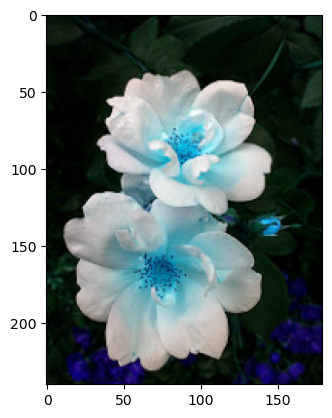

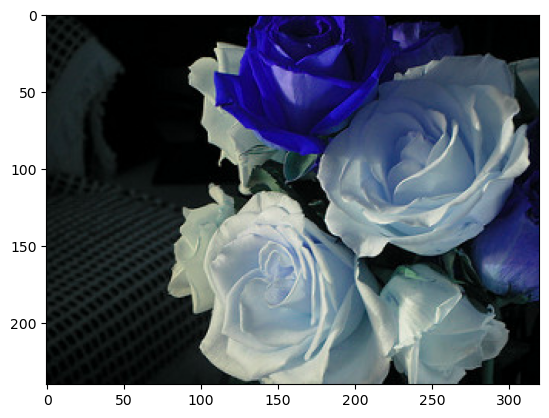

['100930342_92e8746431_n.jpg', '10094729603_eeca3f2cb6.jpg', '10094731133_94a942463c.jpg', '10128546863_8de70c610d.jpg', '10163955604_ae0b830975_n.jpg', '10164073235_f29931d91e.jpg', '10686568196_b1915544a8.jpg', '107693873_86021ac4ea_n.jpg', '10791227_7168491604.jpg', '10995953955_089572caf0.jpg', '110147301_ad921e2828.jpg', '112334842_3ecf7585dd.jpg', '112428665_d8f3632f36_n.jpg', '112428919_f0c5ad7d9d_n.jpg', '112650879_82adc2cc04_n.jpg', '112651128_7b5d39a346_m.jpg', '112951022_4892b1348b_n.jpg', '112951086_150a59d499_n.jpg', '113291410_1bdc718ed8_n.jpg', '113902743_8f537f769b_n.jpg', '113960470_38fab8f2fb_m.jpg', '11441893003_ab83672800.jpg', '11614202956_1dcf1c96a1.jpg', '116343334_9cb4acdc57_n.jpg', '11746080_963537acdc.jpg', '11746276_de3dec8201.jpg', '11746367_d23a35b085_n.jpg', '11746452_5bc1749a36.jpg', '11746548_26b3256922_n.jpg', '12024561754_ce9667e4dc_n.jpg', '12025038686_7f10811d4b_n.jpg', '12025042086_78bafc0eb6_n.jpg', '12163418275_bd6a1edd61.jpg', '122450705_9885fff3

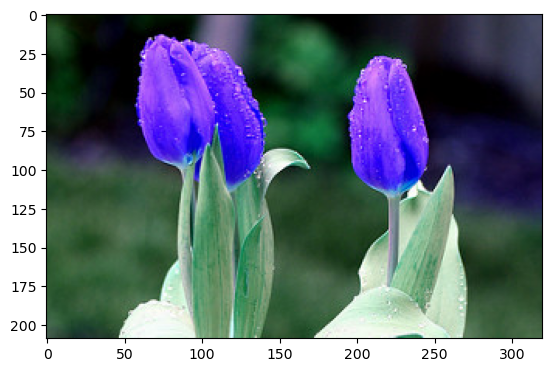

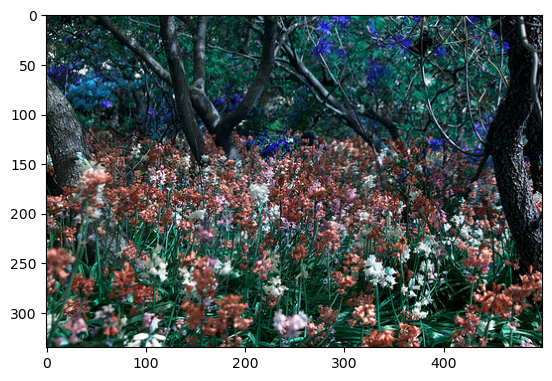

In [5]:
#display 2 rose and 2 tulip images
rose_dir = os.path.join(data_dir, 'roses')
rose_files = os.listdir(rose_dir)
print(rose_files)
for i in range(2):
    img = cv2.imread(os.path.join(rose_dir, rose_files[i]))
    plt.imshow(img)
    plt.show()
tulip_dir = os.path.join(data_dir, 'tulips')
tulip_files = os.listdir(tulip_dir)
print(tulip_files)
for i in range(2):
    img = cv2.imread(os.path.join(tulip_dir, tulip_files[i]))
    plt.imshow(img)
    plt.show()

In [6]:
#resize images
img_size = 180
new_data_dir = 'flower_photos_resized'
if not os.path.exists(new_data_dir):
    os.mkdir(new_data_dir)
for c in classes:
    class_dir = os.path.join(new_data_dir, c)
    if not os.path.exists(class_dir):
        os.mkdir(class_dir)
    for img in os.listdir(os.path.join(data_dir, c)):
        img_array = cv2.imread(os.path.join(data_dir, c, img))
        new_img_array = cv2.resize(img_array, (img_size, img_size))
        cv2.imwrite(os.path.join(class_dir, img), new_img_array)
        

In [7]:
#split data into training and testing
training_data = []
for c in classes:
    class_dir = os.path.join(new_data_dir, c)
    class_num = classes.index(c)
    for img in os.listdir(class_dir):
        try:
            img_array = cv2.imread(os.path.join(class_dir, img))
            training_data.append([img_array, class_num])
        except Exception as e:
            pass
print(len(training_data))
random.shuffle(training_data)
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, img_size, img_size, 3)
y = np.array(y)
print(X.shape)
print(y.shape)
pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()
pickle_in = open('X.pickle', 'rb')
X = pickle.load(pickle_in)
pickle_in = open('y.pickle', 'rb')
y = pickle.load(pickle_in)
X = X/255.0


3670
(3670, 180, 180, 3)
(3670,)


In [ ]:
# #AUTOTUNE
# AUTOTUNE = tf.data.experimental.AUTOTUNE
# #train test split
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)
# #convert to tensorflow dataset
# train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
# test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
# #shuffle and batch
# BATCH_SIZE = 32
# train_ds = train_ds.shuffle(buffer_size=len(X_train)).batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
# test_ds = test_ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)


In [ ]:
#rescale the data
# X = X/255.0
# #train test split
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)
# #convert to tensorflow dataset
# train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
# test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
# #shuffle and batch
# BATCH_SIZE = 32
# train_ds = train_ds.shuffle(buffer_size=len(X_train)).batch(BATCH_SIZE)
# test_ds = test_ds.batch(BATCH_SIZE)



In [8]:
#build model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 64)      1792      
                                                                 
 activation (Activation)     (None, 178, 178, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 87, 87, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                    

In [9]:
#train model
start = time.time()
history = model.fit(X, y, batch_size = 32, epochs = 10, validation_split = 0.1)
end = time.time()
print("Model took %0.2f seconds to train"%(end - start))
model.save('flower_model.h5')
print("Model saved to disk.")


Epoch 1/10
104/104 [==============================] - 121s 1s/step - loss: 1.9102 - accuracy: 0.3875 - val_loss: 1.3460 - val_accuracy: 0.4142
Epoch 2/10
104/104 [==============================] - 119s 1s/step - loss: 1.2712 - accuracy: 0.4965 - val_loss: 1.2347 - val_accuracy: 0.4877
Epoch 3/10
104/104 [==============================] - 120s 1s/step - loss: 1.0516 - accuracy: 0.6025 - val_loss: 1.2243 - val_accuracy: 0.4986
Epoch 4/10
104/104 [==============================] - 488s 5s/step - loss: 0.8411 - accuracy: 0.7006 - val_loss: 1.4681 - val_accuracy: 0.4959
Epoch 5/10
104/104 [==============================] - 71s 679ms/step - loss: 0.6078 - accuracy: 0.7953 - val_loss: 1.8664 - val_accuracy: 0.4959
Epoch 6/10
104/104 [==============================] - 71s 687ms/step - loss: 0.4255 - accuracy: 0.8622 - val_loss: 1.9385 - val_accuracy: 0.4687
Epoch 7/10
104/104 [==============================] - 77s 738ms/step - loss: 0.2443 - accuracy: 0.9310 - val_loss: 2.4194 - val_accuracy: 

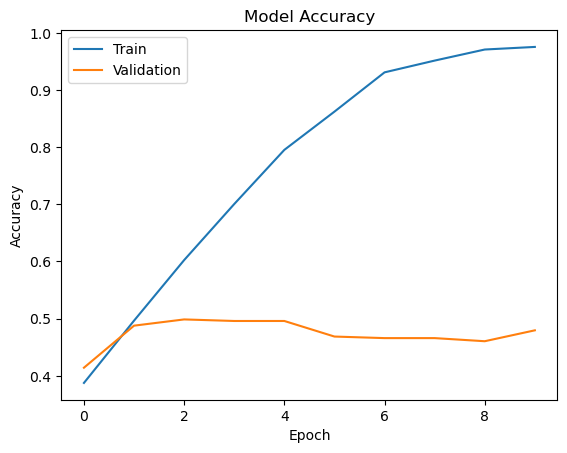

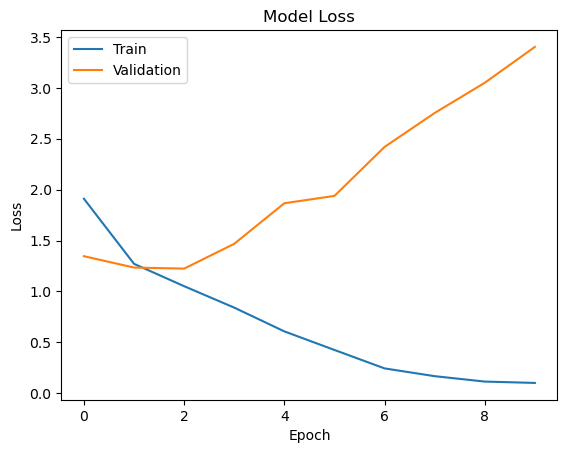

In [10]:
#visualise training results
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()


Epoch 1/10
104/104 [==============================] - 133s 1s/step - loss: 1.5434 - accuracy: 0.4269 - val_loss: 1.3920 - val_accuracy: 0.4305
Epoch 2/10
104/104 [==============================] - 137s 1s/step - loss: 1.2323 - accuracy: 0.5159 - val_loss: 1.1211 - val_accuracy: 0.5695
Epoch 3/10
104/104 [==============================] - 130s 1s/step - loss: 1.0943 - accuracy: 0.5680 - val_loss: 1.0351 - val_accuracy: 0.5940
Epoch 4/10
104/104 [==============================] - 129s 1s/step - loss: 1.0462 - accuracy: 0.5880 - val_loss: 1.1634 - val_accuracy: 0.5123
Epoch 5/10
104/104 [==============================] - 127s 1s/step - loss: 1.0424 - accuracy: 0.5907 - val_loss: 1.0981 - val_accuracy: 0.5613
Epoch 6/10
104/104 [==============================] - 126s 1s/step - loss: 0.9832 - accuracy: 0.6113 - val_loss: 0.9806 - val_accuracy: 0.5995
Epoch 7/10
104/104 [==============================] - 126s 1s/step - loss: 0.9303 - accuracy: 0.6346 - val_loss: 1.0125 - val_accuracy: 0.5777

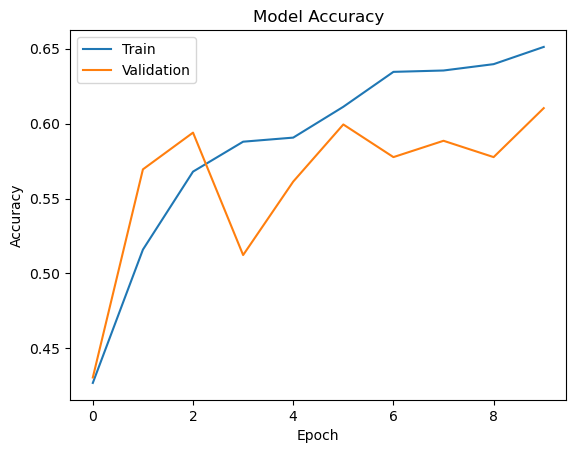

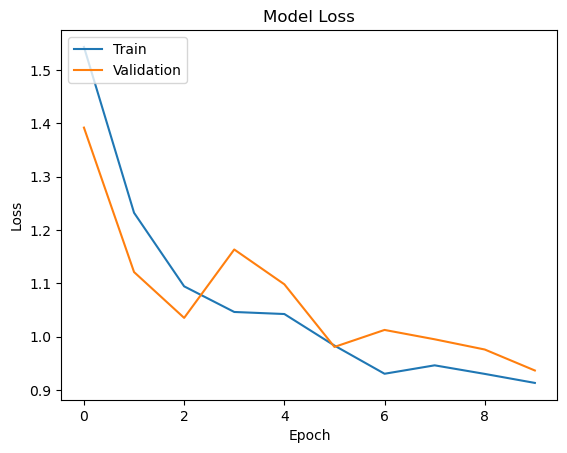

In [11]:
#data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range = 20, width_shift_range = 0.2, height_shift_range = 0.2, horizontal_flip = True, validation_split = 0.1)
train_generator = datagen.flow(X, y, batch_size = 32, subset = 'training')
val_generator = datagen.flow(X, y, batch_size = 32, subset = 'validation')
start = time.time()
history = model.fit(train_generator, epochs = 10, validation_data = val_generator)
end = time.time()
print("Model took %0.2f seconds to train"%(end - start))
model.save('flower_model_aug.h5')
print("Model saved to disk.")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 178, 178, 64)      1792      
                                                                 
 activation_3 (Activation)   (None, 178, 178, 64)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 89, 89, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 activation_4 (Activation)   (None, 87, 87, 64)        0         
                                                      

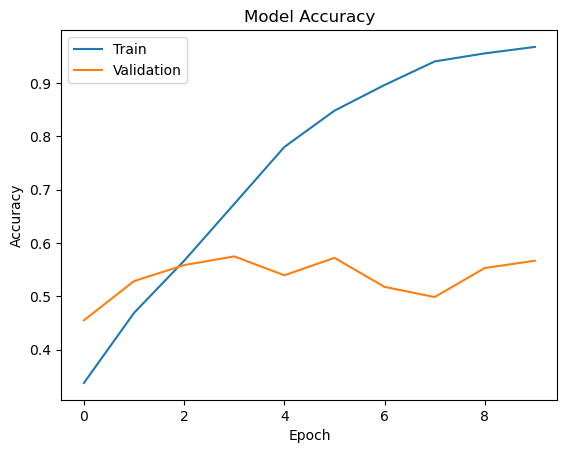

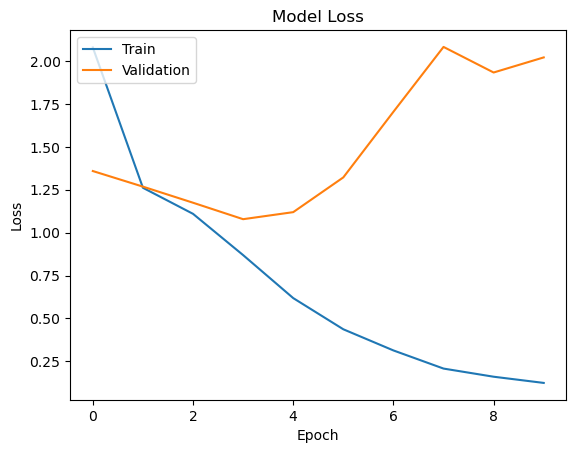

In [12]:
#Droput Regularization
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()
start = time.time()
history = model.fit(X, y, batch_size = 32, epochs = 10, validation_split = 0.1)
end = time.time()
print("Model took %0.2f seconds to train"%(end - start))
model.save('flower_model_dropout.h5')
print("Model saved to disk.")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()


In [27]:
#predict on new data
from tensorflow.keras.models import load_model
model = load_model('flower_model_aug.h5')
img = cv2.imread('flower_photos/daisy/100080576_f52e8ee070_n.jpg')
img = cv2.resize(img, (img_size, img_size))
img = np.array(img).reshape(-1, img_size, img_size, 3)
img = img/255.0
prediction = model.predict(img)
print(prediction)
# print(classes[np.argmax(prediction)],100*np.max(prediction))
print('This image most likely belongs to {} with a {:.2f} percent confidence.'.format(classes[np.argmax(prediction)],100*np.max(prediction)))

1/1 [==============================] - 0s 75ms/step
[[0.0823161  0.76049984 0.04036884 0.08227047 0.03454475]]
This image most likely belongs to dandelion with a 76.05 percent confidence.


In [ ]:
#predict on new data
from tensorflow.keras.models import load_model
model2 = load_model('flower_model_dropout.h5')
img = cv2.imread('flower_photos/daisy/100080576_f52e8ee070_n.jpg')
img = cv2.resize(img, (img_size, img_size))
img = np.array(img).reshape(-1, img_size, img_size, 3)
img = img/255.0
prediction2 = model2.predict(img)
print(prediction2)
print(classes[np.argmax(prediction2)])
print('This image most likely belongs to {} with a {:.3f} percent confidence.'.format(classes[np.argmax(score)],100*np.max(score)))

1/1 [==============================] - 0s 99ms/step
[[0.45759532 0.46144247 0.00951414 0.05253493 0.01891312]]
dandelion
This image most likely belongs to daisy with a 28.80 percent confidence.


In [17]:
#predict on new data
from tensorflow.keras.models import load_model
model3 = load_model('flower_model_aug.h5')
img = cv2.imread('flower_photos/daisy/100080576_f52e8ee070_n.jpg')
img = cv2.resize(img, (img_size, img_size))
img = np.array(img).reshape(-1, img_size, img_size, 3)
img = img/255.0
prediction3 = model3.predict(img)
print(prediction3)
print(classes[np.argmax(prediction3)])
print('This image most likely belongs to {} with a {:.3f} percent confidence.'.format(classes[np.argmax(score)],100*np.max(score)))

1/1 [==============================] - 0s 97ms/step
[[0.0823161  0.76049984 0.04036884 0.08227047 0.03454475]]
dandelion
This image most likely belongs to daisy with a 28.799 percent confidence.
